# Outlier Treatment

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [291]:
train_imp= pd.read_csv('train_NA_imputed.csv')
train_imp.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,4,4,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,2,0,61,0,0,0,0,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,2,298,0,0,0,0,0,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,4,3,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,2,0,42,0,0,0,0,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,4,1,4,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,2,0,35,272,0,0,0,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,4,0,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,2,192,84,0,0,0,0,2,0,12,2008,8,4,250000


In [250]:
train_imp.isnull().sum().sort_values(ascending=False).head(5)

SalePrice       0
Exterior2nd     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [251]:
#original data
train= pd.read_csv('train.csv')

In [252]:
col_names= train_imp.columns
col_names
train=pd.DataFrame(train[col_names])

In [253]:
print(train.shape)
print(train_imp.shape)

(1460, 69)
(1460, 69)


In [254]:
# Missing data imputation

train['Alley']=train['Alley'].fillna('Missing')
train['Fence']=train['Fence'].fillna('Missing')
train['BsmtExposure']=train['BsmtExposure'].fillna('Missing')
train['BsmtCond']=train['BsmtCond'].fillna('Missing')
train['BsmtQual']=train['BsmtQual'].fillna('Missing')
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train['LotFrontage']= train_imp['LotFrontage'].copy() 

## Feature Engineering

In [255]:
train['Age']= train['YrSold']- train['YearBuilt']
train['LastRemod']= train['YrSold']- train['YearRemodAdd']
train.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'YrSold'], inplace=True, axis=1)

In [256]:
numeric_features= train.select_dtypes(include=[np.integer]).columns 
categorical_features= train.select_dtypes(include=[np.object]).columns

## Separate Target from Predictors

In [274]:
train_Y= train['SalePrice'].copy()
train_X= train.copy()

## Impute Outlier -- Using Standard Deviation

In [278]:
def impute_outlier(data, features):
    for col in features:
        std= data[col].std()
        mean= data[col].mean()
        cut_off= std*3
        upper, lower= mean+ cut_off, mean-cut_off
        for row in range(train.shape[0]):
            if data.loc[row, col] < lower:
                data.loc[row, col]=lower
            elif data.loc[row, col] > upper:
                data.loc[row, col]=upper
            else:
                data.loc[row, col]=data.loc[row, col]
    return data

data_std= train_X.copy()

data_std= impute_outlier(data_std, numeric_features)
data_std.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,LastRemod
0,60.0,RL,65.0,8450.0,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,706.0,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2,1.0,3.0,1.0,Gd,8.0,Typ,0.0,2,Y,0.0,61.0,0.0,0.0,0.0,0.0,Missing,0.0,2,WD,Normal,208500.0,5.0,5


In [282]:
data_std['SalePrice']= train['SalePrice'].copy()
data_std[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.769842,41.906682,20.000000,20.00,50.0,70.00,183.798973
LotArea,1460.0,10090.655546,5224.271885,1300.000000,7553.50,9478.5,11601.50,40460.622879
OverallQual,1460.0,6.100617,1.378633,1.950325,5.00,6.0,7.00,10.000000
OverallCond,1460.0,5.575701,1.103269,2.236944,5.00,5.0,6.00,8.913740
BsmtFinSF1,1460.0,440.146304,433.685241,0.000000,0.00,383.5,712.25,1811.933999
BsmtFinSF2,1460.0,38.638600,122.229695,0.000000,0.00,0.0,0.00,530.507133
BsmtUnfSF,1460.0,566.198804,438.428516,0.000000,223.00,477.5,808.00,1892.841277
TotalBsmtSF,1460.0,1052.359900,409.572045,0.000000,795.75,991.5,1298.25,2373.545425
1stFlrSF,1460.0,1158.673068,367.450775,334.000000,882.00,1087.0,1391.25,2322.389926
2ndFlrSF,1460.0,346.359117,434.418425,0.000000,0.00,0.0,728.00,1656.577773


## Impute Outlier -- using IQR

In [272]:
def impute_outlier_IQR(data, features):
    for col in features:
        percentile_75= np.percentile(data[col], 75)
        percentile_25= np.percentile(data[col], 25)
        IQR= percentile_75-percentile_25
        cut_off= IQR*1.5
        upper, lower= percentile_75 + cut_off, percentile_25 - cut_off
        for row in range(train.shape[0]):
            if data.loc[row, col] < lower:
                data.loc[row, col]=lower
            elif data.loc[row, col] > upper:
                data.loc[row, col]=upper
            else:
                data.loc[row, col]=data.loc[row, col]
    return data

data_iqr= train_X.copy()

data_iqr= impute_outlier_IQR(data_iqr, numeric_features)

In [283]:
data_iqr['SalePrice']= train['SalePrice'].copy()
data_iqr[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,55.085616,37.508183,20.0,20.00,50.0,70.00,145.000
LotArea,1460.0,9647.388014,3594.356399,1481.5,7553.50,9478.5,11601.50,17673.500
OverallQual,1460.0,6.100685,1.378430,2.0,5.00,6.0,7.00,10.000
OverallCond,1460.0,5.543493,0.963696,3.5,5.00,5.0,6.00,7.500
BsmtFinSF1,1460.0,439.997517,433.219435,0.0,0.00,383.5,712.25,1780.625
BsmtFinSF2,1460.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.000
BsmtUnfSF,1460.0,563.777740,431.710214,0.0,223.00,477.5,808.00,1685.500
TotalBsmtSF,1460.0,1050.254795,397.937878,42.0,795.75,991.5,1298.25,2052.000
1stFlrSF,1460.0,1157.018151,362.583002,334.0,882.00,1087.0,1391.25,2155.125
2ndFlrSF,1460.0,346.789041,435.791621,0.0,0.00,0.0,728.00,1820.000


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


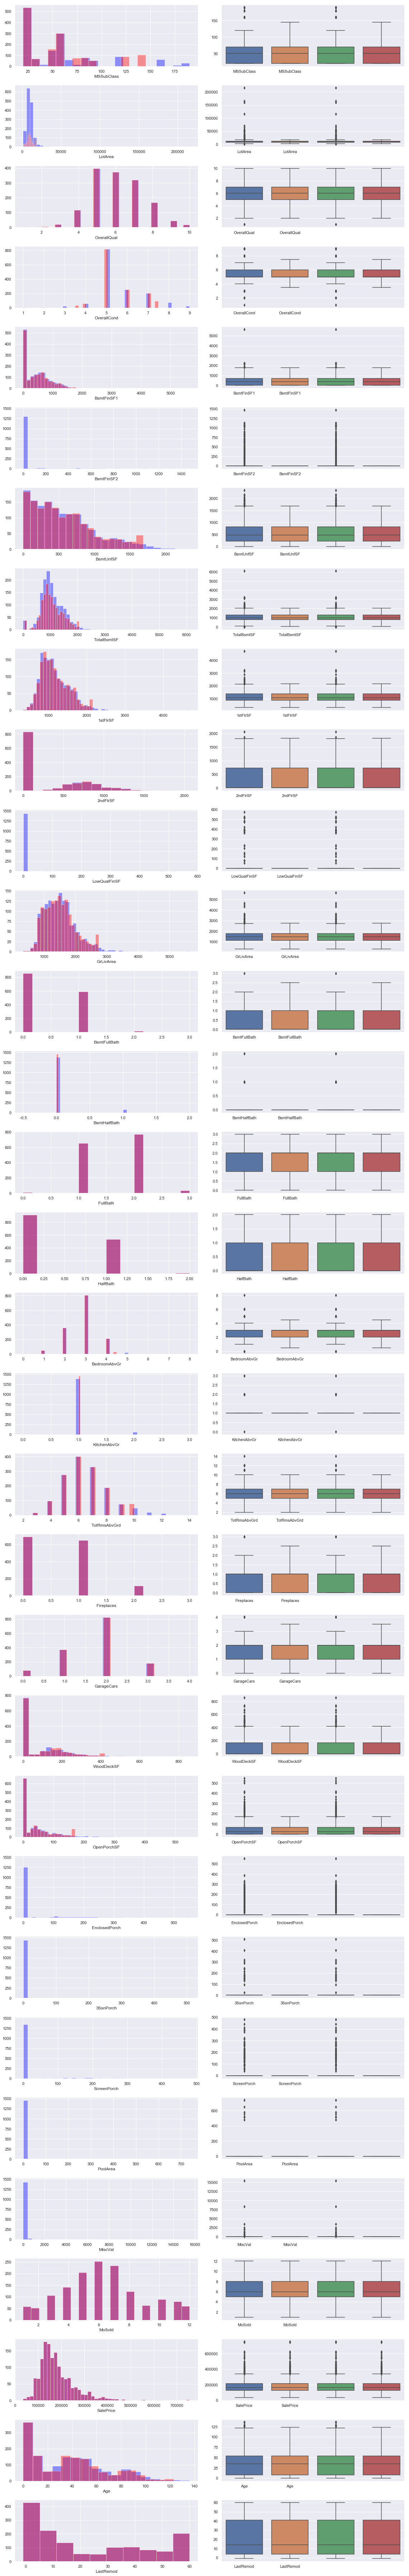

In [284]:
sns.set()
fig, ax= plt.subplots(nrows= numeric_features.shape[0], ncols=2)
fig.set_size_inches(16,100)

for index, variable in enumerate(numeric_features):
    sns.distplot(train[variable], kde=False, ax= ax[index, 0], color='blue')
    sns.distplot(data_iqr[variable], kde=False, ax=ax[index, 0], color='red')
    
    sns.boxplot(data= pd.concat([train[variable], data_iqr[variable]], axis=1), ax= ax[index, 1])
    
plt.tight_layout()

In [285]:
print(numeric_features)
data_iqr[numeric_features].head(5)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age', 'LastRemod'],
      dtype='object')


,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LastRemod
0,60.0,8450.0,7.0,5.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2,1,3.0,1.0,8.0,0.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,208500,5.0,5
1,20.0,9600.0,6.0,7.5,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,0.0,2,0,3.0,1.0,6.0,1.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,181500,31.0,31
2,60.0,11250.0,7.0,5.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2,1,3.0,1.0,6.0,1.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,223500,7.0,6
3,70.0,9550.0,7.0,5.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1,0,3.0,1.0,7.0,1.0,3.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2,140000,91.0,36
4,60.0,14260.0,8.0,5.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2,1,4.0,1.0,9.0,1.0,3.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,250000,8.0,8


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


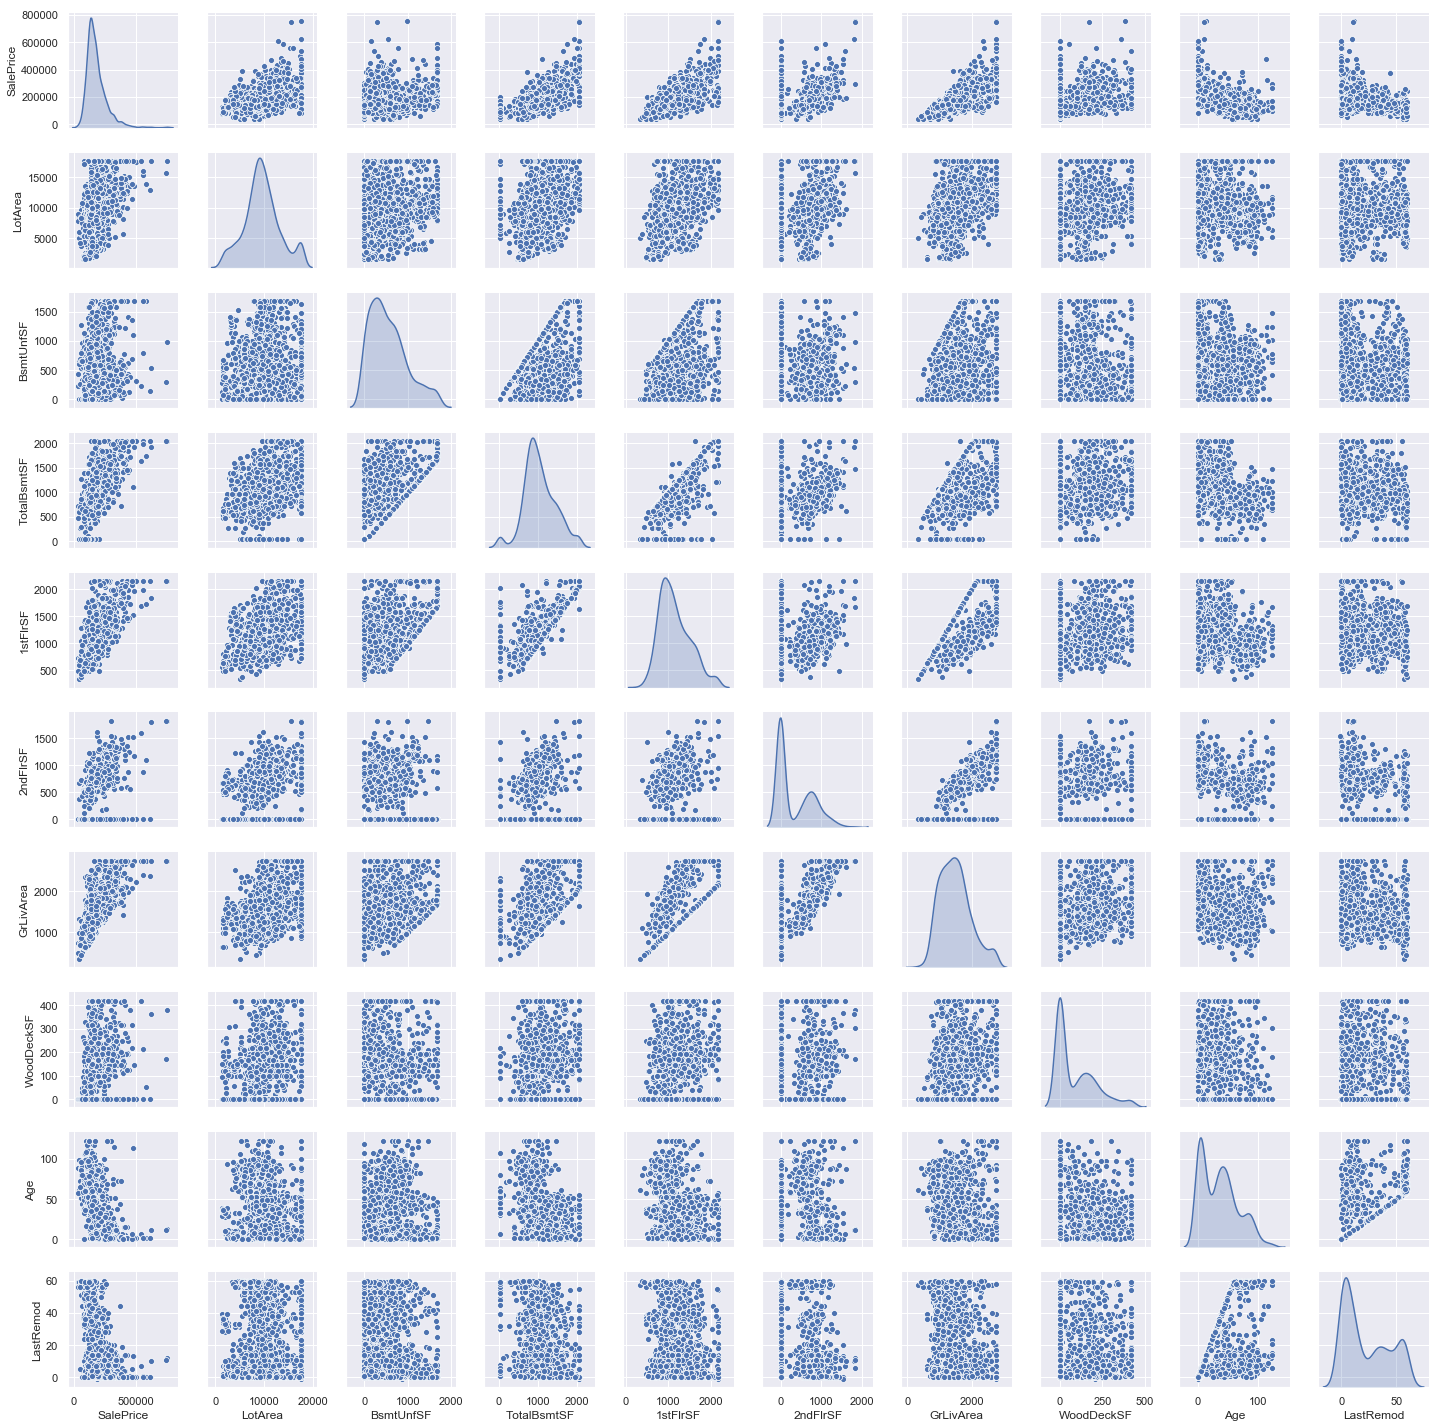

In [286]:
sns.set()
columns=['SalePrice', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
         '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'Age', 'LastRemod']
sns.pairplot(data_iqr[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

In [289]:
data_iqr.to_csv('train_NaN_Outlier_Imputed.csv', index=False)